## This will be a space where I play out any further analyses

In [1]:
import pandas as pd
import nltk
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns        # seaborn graphical package
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

### Table of Contents:
* [First Section](#First-Section): finding adjectives in president debate
* [Second Section](#Second-Section): finding CM and SP adjectives in Donald Trump vs. Joe Biden
* [Third Section](#Third-Section): finding adjectives in all debates
* [Fourth Section](#Fourth-Section): most frequent adjectives used
* [Fifth Section](#Fifth-Section): finding adjectives in vp debates
* [Sixth Section](#Sixth-Section): finding adjectives in convention speeches
* [Seventh Section](#Seventh-Section): finding adjectives in platform
* [Eighth Section](#Eighth-Section): comparing each mode of text
* [Nineth Section](#Nineth-Section): finding most informative adjectives in debates

### First Section

In [2]:
allpresdebate = pd.read_csv("/Users/emmatarcson/Documents/data_science/RhetoricalFactor-analysis/data/all_speakers/presdebatewelker.csv")
allpresdebate = allpresdebate[['Aff','transcript']]
allpresdebate.Aff.value_counts()

R       193
None    188
D       131
Name: Aff, dtype: int64

In [3]:
allpresdebate

,Aff,transcript
0,None,"Good evening, everyone. Good evening. Thank yo..."
1,R,How are you doing? How are you?
2,None,And I do want to say a very good evening to bo...
3,None,The goal is for you to hear each other and for...
4,None,… during this next stage of the coronavirus cr...
...,...,...
507,None,"All right. Vice President Biden, same question..."
508,D,"I will say, I’m an American President. I repre..."
509,D,"We can grow this economy, we can deal with the..."
510,None,"All right, I want to thank you both for a very..."


In [4]:
import pandas as pd
from textblob import TextBlob

In [5]:
def get_adjectives(text):
    blob = TextBlob(text)
    return ' '.join(word for (word,tag) in blob.tags if tag.startswith("JJ"))

allpresdebate['adjectives'] = allpresdebate['transcript'].apply(get_adjectives)
adj_count = [len(nltk.word_tokenize(t)) for t in allpresdebate.adjectives]
allpresdebate['adj_count'] = adj_count

In [6]:
allpresdebate

,Aff,transcript,adjectives,adj_count
0,None,"Good evening, everyone. Good evening. Thank yo...",Good Good such final first first glad thankful...,23
1,R,How are you doing? How are you?,,0
2,None,And I do want to say a very good evening to bo...,good major uninterrupted first,4
3,None,The goal is for you to hear each other and for...,other American re ready first dangerous new Mo...,13
4,None,… during this next stage of the coronavirus cr...,next,1
...,...,...,...,...
507,None,"All right. Vice President Biden, same question...",same inaugural,2
508,D,"I will say, I’m an American President. I repre...",American sure enormous enormous better,5
509,D,"We can grow this economy, we can deal with the...",systemic same sure clean new ’ sure sure ’ last,10
510,None,"All right, I want to thank you both for a very...",robust fantastic tonight most great,5


In [7]:
allpresdebate[allpresdebate.Aff == 'D'].adj_count.describe()

count    131.000000
mean       4.282443
std        4.751153
min        0.000000
25%        0.500000
50%        2.000000
75%        7.000000
max       21.000000
Name: adj_count, dtype: float64

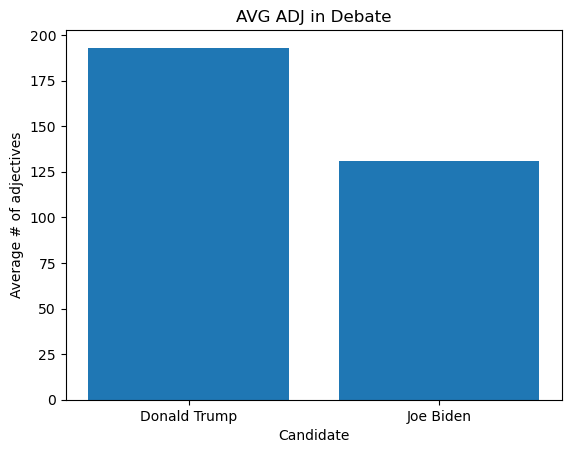

In [8]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

aff = ['Donald Trump','Joe Biden']
mean_adj = [allpresdebate[allpresdebate.Aff == 'R'].adj_count.count(), allpresdebate[allpresdebate.Aff == 'D'].adj_count.count()]

plt.bar(aff,mean_adj)
plt.title('AVG ADJ in Debate')
plt.ylabel('Average # of adjectives')
plt.xlabel('Candidate')
#plt.savefig('adj_pres.png')
plt.show()

### Second Section

In [9]:
def get_adjectives(text):
    blob = TextBlob(text)
    return ' '.join(word for (word,tag) in blob.tags if tag=='JJR' or tag=='JJS')

allpresdebate['adjectives3'] = allpresdebate['transcript'].apply(get_adjectives)
adj_count = [len(nltk.word_tokenize(t)) for t in allpresdebate.adjectives3]
allpresdebate['adj_count3'] = adj_count

In [10]:
allpresdebate.adj_count3.describe()

count    512.000000
mean       0.230469
std        0.706144
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: adj_count3, dtype: float64

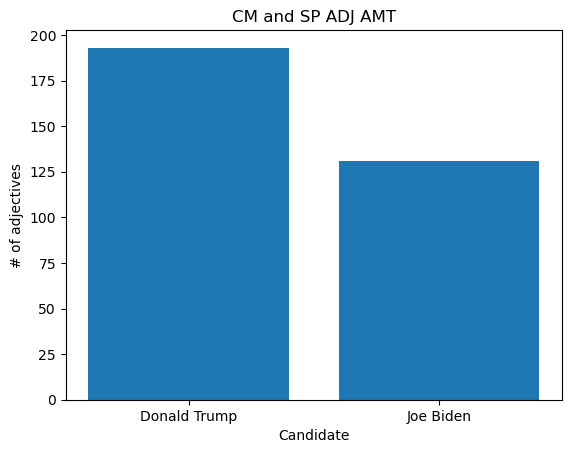

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

aff = ['Donald Trump','Joe Biden']
mean_adj = [allpresdebate[allpresdebate.Aff == 'R'].adj_count3.count(), allpresdebate[allpresdebate.Aff == 'D'].adj_count3.count()]

plt.bar(aff,mean_adj)
plt.title('CM and SP ADJ AMT')
plt.ylabel('# of adjectives')
plt.xlabel('Candidate')
#plt.savefig('adj_donnie.png')
plt.show()

### Third Section

In [12]:
allvpdebate = pd.read_csv("/Users/emmatarcson/Documents/data_science/RhetoricalFactor-analysis/data/all_speakers/pagedebate2020.csv")
allvpdebate = allvpdebate[['Aff','transcript']]
allvpdebate.Aff.value_counts()

None    120
R       113
D        94
Name: Aff, dtype: int64

In [13]:
vpdebate = pd.read_csv("/Users/emmatarcson/Documents/data_science/RhetoricalFactor-analysis/data/only_D_and_R/pageVPdebate.csv")
vpdebate = vpdebate[['Aff','transcript']]

presdebate = pd.read_csv("/Users/emmatarcson/Documents/data_science/RhetoricalFactor-analysis/data/only_D_and_R/welkerPRESdebate.csv")
presdebate = presdebate[['Aff','transcript']]

In [14]:
alldebates = pd.concat([vpdebate, presdebate])
def get_adjectives(text):
    blob = TextBlob(text)
    return ' '.join(word for (word,tag) in blob.tags if tag.startswith("JJ"))

alldebates['adjectives'] = alldebates['transcript'].apply(get_adjectives)
adj_count = [len(nltk.word_tokenize(t)) for t in alldebates.adjectives]
alldebates['adj_count'] = adj_count

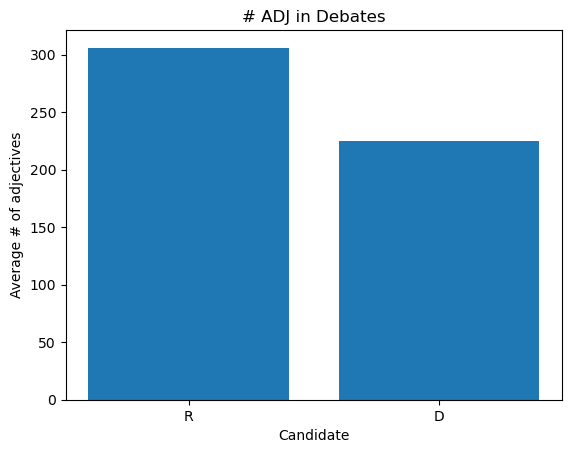

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

aff = ['R','D']
mean_adj = [alldebates[alldebates.Aff == 'R'].adj_count.count(), alldebates[alldebates.Aff == 'D'].adj_count.count()]

plt.bar(aff,mean_adj)
plt.title('# ADJ in Debates')
plt.ylabel('Average # of adjectives')
plt.xlabel('Candidate')
#plt.savefig('adj_alldebate.png')
plt.show()

### Fourth Section

In [16]:
pagetok = nltk.RegexpTokenizer(r'[a-z][a-z][a-z]+')
pagewords = pagetok.tokenize(str(list(alldebates.adjectives.values)).lower())
mostused = nltk.FreqDist(pagewords)
hello = mostused.most_common(30)


In [17]:
hello

[('american', 112),
 ('more', 47),
 ('other', 36),
 ('first', 30),
 ('last', 27),
 ('sure', 26),
 ('many', 25),
 ('good', 25),
 ('able', 24),
 ('clear', 24),
 ('great', 22),
 ('big', 20),
 ('public', 19),
 ('new', 17),
 ('true', 16),
 ('same', 14),
 ('best', 13),
 ('rid', 13),
 ('single', 13),
 ('better', 13),
 ('criminal', 12),
 ('little', 11),
 ('next', 11),
 ('different', 11),
 ('free', 10),
 ('less', 10),
 ('responsible', 10),
 ('military', 10),
 ('young', 9),
 ('important', 9)]

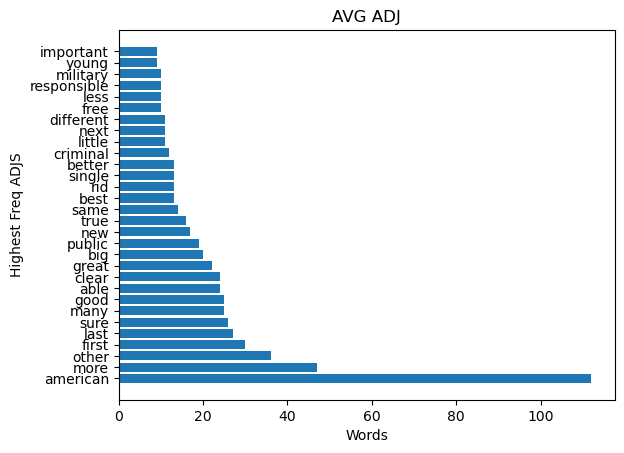

In [18]:
words = [i[0] for i in hello]
mean_adj = [i[1] for i in hello]

plt.barh(words, mean_adj)
plt.title('AVG ADJ')
plt.ylabel('Highest Freq ADJS')
plt.xlabel('Words')
#plt.savefig('adj_freq.png')
plt.show()

### Fifth Section

In [19]:
def get_adjectives(text):
    blob = TextBlob(text)
    return ' '.join(word for (word,tag) in blob.tags if tag.startswith("JJ"))

allvpdebate['adjectives'] = allvpdebate['transcript'].apply(get_adjectives)
adj_count = [len(nltk.word_tokenize(t)) for t in allvpdebate.adjectives]
allvpdebate['adj_count'] = adj_count

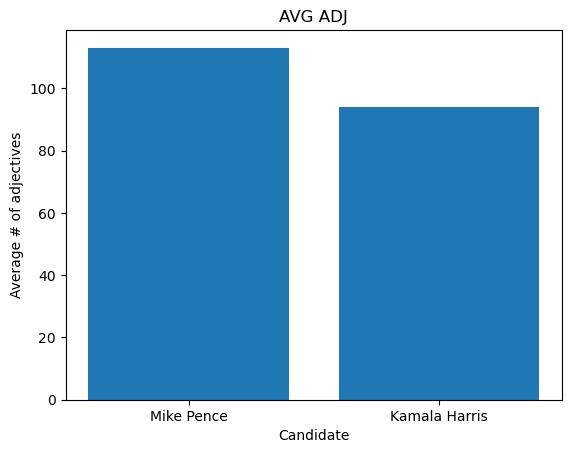

In [20]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

aff = ['Mike Pence','Kamala Harris']
mean_adj = [allvpdebate[allvpdebate.Aff == 'R'].adj_count.count(), allvpdebate[allvpdebate.Aff == 'D'].adj_count.count()]

plt.bar(aff,mean_adj)
plt.title('AVG ADJ')
plt.ylabel('Average # of adjectives')
plt.xlabel('Candidate')
plt.savefig('adj_vp.png')
plt.show()

### Sixth Section

In [21]:
conv_speech = pd.read_csv("/Users/emmatarcson/Documents/data_science/RhetoricalFactor-analysis/data_sample/convspeeches.csv")
conv_speech = conv_speech[['Aff','Speech']]
conv_speech.Aff.value_counts()

R    30
D    21
Name: Aff, dtype: int64

In [22]:
dem = conv_speech[conv_speech.Aff == 'D'].Speech
rep = conv_speech[conv_speech.Aff == 'R'].Speech

demfull = str(list(dem.values)).replace("',", '.').replace(" '"," ").strip('[]').strip("''")
repfull = str(list(rep.values)).replace("',", '.').replace(" '"," ").strip('[]').strip("''")

In [23]:
rep_speech = nltk.sent_tokenize(repfull)
rep_speech2 = pd.DataFrame({'Aff':'R',
                         'Sent': rep_speech})
dem_speech = nltk.sent_tokenize(demfull)
dem_speech2 = pd.DataFrame({'Aff':'D',
                         'Sent': dem_speech})
aff_sent = pd.concat([rep_speech2,dem_speech2])
aff_sent

,Aff,Sent
0,R,"""I'm Ben Carson, a retired neurosurgeon and a ..."
1,R,"Before I begin, I'd like to say that our heart..."
2,R,"As Jacob's mother has urged the country, let's..."
3,R,America is great when we behave greatly.
4,R,"In order to succeed and change, we must first ..."
...,...,...
1094,D,"Here's the truth, Donald Trump doesn't want an..."
1095,D,So whether you plan to vote by mail or in pers...
1096,D,Don't let Donald Trump take that away from you.
1097,D,"For accurate, up to date voting information th..."


In [24]:
def get_adjectives(text):
    blob = TextBlob(text)
    return ' '.join(word for (word,tag) in blob.tags if tag.startswith("JJ"))

aff_sent['adjectives'] = aff_sent['Sent'].apply(get_adjectives)
adj_count = [len(nltk.word_tokenize(t)) for t in aff_sent.adjectives]
aff_sent['adj_count'] = adj_count

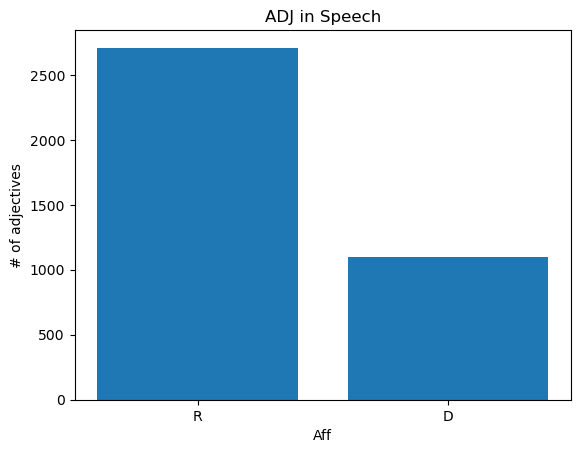

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

aff = ['R','D']
mean_adj = [aff_sent[aff_sent.Aff == 'R'].adj_count.count(), aff_sent[aff_sent.Aff == 'D'].adj_count.count()]

plt.bar(aff,mean_adj)
plt.title('ADJ in Speech')
plt.ylabel('# of adjectives')
plt.xlabel('Aff')
plt.savefig('adj_speech.png')
plt.show()

### Seventh Section

In [26]:
platform = pd.read_csv("/Users/emmatarcson/Documents/data_science/RhetoricalFactor-analysis/data2/platformsents.csv")
platform = platform[['Aff','sentences']]
platform.Aff.value_counts()

R    1581
D    1527
Name: Aff, dtype: int64

In [27]:
def get_adjectives(text):
    blob = TextBlob(text)
    return ' '.join(word for (word,tag) in blob.tags if tag.startswith("JJ"))

platform['adjectives'] = platform['sentences'].apply(get_adjectives)
adj_count = [len(nltk.word_tokenize(t)) for t in platform.adjectives]
platform['adj_count'] = adj_count

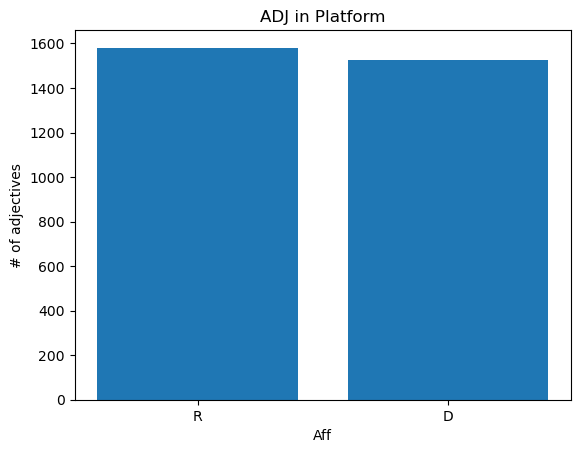

In [28]:
aff = ['R','D']
mean_adj = [platform[platform.Aff == 'R'].adj_count.count(), platform[platform.Aff == 'D'].adj_count.count()]

plt.bar(aff,mean_adj)
plt.title('ADJ in Platform')
plt.ylabel('# of adjectives')
plt.xlabel('Aff')
plt.savefig('adj_plat.png')
plt.show()

### Eighth Section

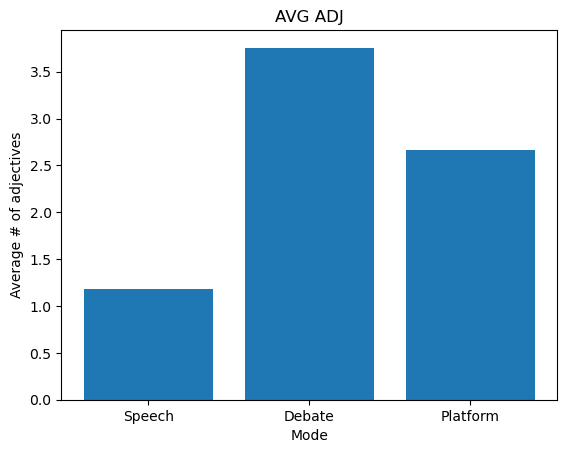

In [29]:
aff = ['Speech','Debate', 'Platform']
mean_adj = [aff_sent.adj_count.mean(), alldebates.adj_count.mean(), platform.adj_count.mean()]

plt.bar(aff,mean_adj)
plt.title('AVG ADJ')
plt.ylabel('Average # of adjectives')
plt.xlabel('Mode')
#plt.savefig('avg_adj_all.png')
plt.show()

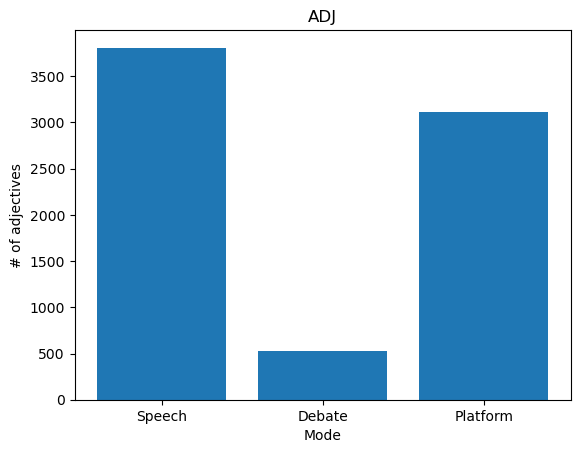

In [30]:
aff = ['Speech','Debate', 'Platform']
mean_adj = [aff_sent.adj_count.count(), alldebates.adj_count.count(), platform.adj_count.count()]

plt.bar(aff,mean_adj)
plt.title('ADJ')
plt.ylabel('# of adjectives')
plt.xlabel('Mode')
#plt.savefig('count_adj_all.png')
plt.show()

### Nineth Section

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(allpresdebate['adjectives'], allpresdebate['Aff'], random_state=0,
                                  train_size=0.6) 

vectorizer = TfidfVectorizer(min_df=1, max_features=4000, stop_words='english')

X_text_train = vectorizer.fit_transform(X_train)
X_text_test = vectorizer.transform(X_test)

from sklearn.svm import SVC 
svcmodel = SVC(kernel='linear', C=1E5)  
svcmodel.fit(X_text_train, y_train)
pred = svcmodel.predict(X_text_test)
accuracy_score(y_test, pred)

0.551219512195122

In [32]:
# part 1: presidential debate
X_train, X_test, y_train, y_test = train_test_split(allpresdebate['adjectives'], allpresdebate['Aff'], random_state=0,
                                  train_size=0.6)
nbmodel = MultinomialNB()
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2,max_features=1500, stop_words='english') #using this to find vocab
X_text_train = vectorizer.fit_transform(X_train)
X_text_test = vectorizer.transform(X_test)


nbmodel.fit(X_text_train, y_train)


def print_top(vectorizer, clf, class_labels, n):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top = np.argsort(clf.coef_[i])[0-n:]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j].replace(' ', '-') for j in top)))
    

print_top(vectorizer, nbmodel, nbmodel.classes_, 60)


D: tremendous, unconstitutional, beautiful, bad, uninterrupted, horrible, friendly, military, unethical, long, small, korean, smaller, open, high, tonight, dead, public, great, environmental, worse, black, young, free, little, president, vice, private, soon, nuclear, middle, solitary, best, right, different, ukrainian, economic, unwilling, isn, ve, better, low, wrong, real, old, big, republican, foreign, dangerous, minimum, good, ll, american, clear, federal, single, new, able, true, sure
None: wrong, unwilling, old, friendly, open, free, vibrant, worse, bad, best, better, big, true, smaller, clear, tremendous, dead, successful, economic, soon, solitary, socialized, criminal, possible, sure, long, ukrainian, unethical, beautiful, biggest, korean, dangerous, great, ready, small, minimum, tonight, fantastic, right, different, environmental, black, robust, young, second, unconstitutional, public, specific, nuclear, foreign, good, federal, able, new, uninterrupted, ve, president, vice, ame

In [33]:
allall = pd.concat([allvpdebate, allpresdebate])
def get_adjectives(text):
    blob = TextBlob(text)
    return ' '.join(word for (word,tag) in blob.tags if tag.startswith("JJ"))

allall['adjectives'] = allall['transcript'].apply(get_adjectives)
adj_count = [len(nltk.word_tokenize(t)) for t in allall.adjectives]
allall['adj_count'] = adj_count

In [34]:
# part 2: all debates
X_train, X_test, y_train, y_test = train_test_split(allall['adjectives'], allall['Aff'], random_state=0,
                                  train_size=0.6)
nbmodel = MultinomialNB()
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2,max_features=1500, stop_words='english') #using this to find vocab
X_text_train = vectorizer.fit_transform(X_train)
X_text_test = vectorizer.transform(X_test)


nbmodel.fit(X_text_train, y_train)


def print_top(vectorizer, clf, class_labels, n):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top = np.argsort(clf.coef_[i])[0-n:]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j].replace(' ', '-') for j in top)))
    

print_top(vectorizer, nbmodel, nbmodel.classes_, 60)


D: lower, worried, minimum, significant, second, different, white, bipartisan, look, right, ukrainian, average, black, high, ve, social, transparent, clean, profit, new, affordable, military, low, national, common, little, ll, economic, russian, red, real, nuclear, private, great, renewable, better, preexisting, free, young, bright, foreign, let, complete, best, republican, wrong, public, big, single, safe, able, criminal, rid, important, true, good, responsible, clear, sure, american
None: biggest, long, hasn, beautiful, korean, ukrainian, wealthy, best, foreign, black, white, dangerous, ready, second, right, huge, complicated, professional, minimum, rapid, public, environmental, economic, major, higher, robust, open, important, socialized, modern, unconstitutional, existential, peaceful, great, let, green, nuclear, specific, likely, ll, hardest, sick, different, able, small, young, racial, federal, fundamental, latest, good, new, presidential, president, vice, uninterrupted, american